In [1]:
import numpy as np

In [2]:
from collections import Counter

In [3]:
class knn:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def standardize(self, data, columns_to_standardize):
        for column in columns_to_standardize:
          mean = data[column].mean()
          std = data[column].std()
          data[column] = (data[column] - mean) / std
        return data

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum(((np.array(x1) - np.array(x2)) ** 2)))

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return predictions

    def _predict(self, x):
        distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common()
        return most_common[0][0]

In [4]:
import pandas as pd

train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)
train_df['Cabin'].fillna("unknown", inplace = True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)


In [5]:
obj = knn()
columns_to_standardize = ['Fare', 'Age']
standardized_data = obj.standardize(train_df,  columns_to_standardize)
train_df = standardized_data
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked'], drop_first=True)
selected_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'Survived']
train_df = train_df[selected_features]

In [6]:
from sklearn.model_selection import train_test_split
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
X_train

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
331,1,1.215264,0,0,-0.074541,1,0,1
733,2,-0.515237,0,0,-0.386454,1,0,1
382,3,0.176964,0,0,-0.488580,1,0,1
704,3,-0.284503,1,0,-0.490005,1,0,1
813,3,-1.822726,4,2,-0.018699,0,0,1
...,...,...,...,...,...,...,...,...
106,3,-0.669059,0,0,-0.494114,0,0,1
270,1,0.000000,0,0,-0.024233,1,0,1
860,3,0.869164,2,0,-0.364151,1,0,1
435,1,-1.207437,1,2,1.766749,0,0,1


In [8]:
best_k = None
best_accuracy = 0.0
training_accuracies = []
testing_accuracies = []
K_values = np.arange(1,15)
for i in K_values:

    clf = knn(k=i)
    clf.fit(X_train.values, y_train.values)
    y_train_pred = clf.predict(X_train.values)

    # Calculate training accuracy
    train_accuracy = np.sum(np.array(y_train_pred)==y_train.values) / len(y_train)
    training_accuracies.append(train_accuracy)  # Append training accuracy to the array

    # Make predictions on the testing set
    y_test_pred = clf.predict(X_test.values)

    # Calculate testing accuracy
    test_accuracy = np.sum(np.array(y_test_pred)==y_test.values) / len(y_test)
    testing_accuracies.append(test_accuracy)  # Append testing accuracy to the array

    # Check if this k value gives a better testing accuracy
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_k = i

print("Best K value:", best_k)
print("Best Testing Accuracy:", best_accuracy)

Best K value: 4
Best Testing Accuracy: 0.8491620111731844


In [9]:
import matplotlib.pyplot as plt

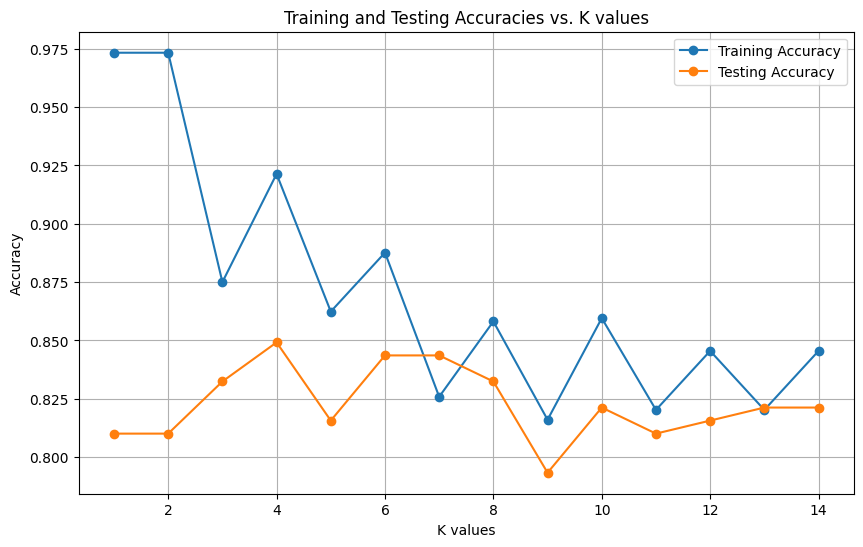

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(K_values, training_accuracies, label="Training Accuracy", marker='o', linestyle='-')
plt.plot(K_values, testing_accuracies, label="Testing Accuracy", marker='o', linestyle='-')
plt.xlabel("K values")
plt.ylabel("Accuracy")
plt.title("Training and Testing Accuracies vs. K values")
plt.legend()
plt.grid(True)
plt.show()

In [11]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [12]:

tuned_knn = KNeighborsClassifier(n_neighbors=best_k)
tuned_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [14]:

folds = KFold(n_splits=5, shuffle=False, random_state=None)
CrossValScore_knn = cross_val_score(estimator=tuned_knn, X=X_train, y=y_train, cv=folds, verbose=1)
print("Cross Validation Score of 5 folds for K=4 : ", CrossValScore_knn, "\n")

print("mean Cross Validation Score 5 folds for K=4 : ", np.mean(CrossValScore_knn), "\n")

print("std Cross-Validation Score 5 folds for k=4 : ", np.std(CrossValScore_knn))

print("Training KNN Score for K=4 : ", tuned_knn.score(X_train, y_train), "\n")

print("Testing KNN Score for K=4 : ", tuned_knn.score(X_test, y_test), "\n")

Cross Validation Score of 5 folds for K=4 :  [0.78321678 0.81818182 0.78169014 0.73943662 0.83098592] 

mean Cross Validation Score 5 folds for K=4 :  0.7907022554909879 

std Cross-Validation Score 5 folds for k=4 :  0.03207277831922115
Training KNN Score for K=4 :  0.8567415730337079 

Testing KNN Score for K=4 :  0.7988826815642458 



In [15]:
y_test.values

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1])

In [16]:
np.array(y_test_pred)

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1])

In [17]:
from sklearn.metrics import confusion_matrix

confclf = knn(k=4)
confclf.fit(X_train.values, y_train.values)
y_test_pred = confclf.predict(X_test.values)

conf_matrix = confusion_matrix(y_test.values, np.array(y_test_pred))

In [18]:
conf_matrix

array([[94, 11],
       [16, 58]])

In [19]:
#confusion matrix for k = 4

# Extract values from the confusion matrix
true_negatives = conf_matrix[1, 1]  # wrong pred
false_positives = conf_matrix[0, 1]
false_negatives = conf_matrix[1, 0]
true_positives = conf_matrix[0, 0]

# Calculate accuracy
accuracy = (true_positives + true_negatives) / (true_positives + true_negatives + false_positives + false_negatives)

print("Accuracy:", accuracy)

#True negatives (TN) individuals who got prediction as not survived and actually too they haven't survived.
#False positives (FP) individuals who got prediction as survived but actually they haven't survived.
#False negatives (FN) individuals who got prediction as not survived, but actual value is survived.
#True positives (TP) individuals who got prediction has survived and also the actual value is survived.

Accuracy: 0.8491620111731844


In [20]:
"""In the above KNN classifier model, we have a accuracy of 84.9 %. On testing the 20% of the data with the
 actual values whill we run the best K_value finer using for loop, as we got k = 4, for the above accuracy. We have
 used same k_value i.e 4 to evaluate using confusion matrix, we've got the same accuracy as the model above on using
 the parameters as X_test and y_test values."""

"In the above KNN classifier model, we have a accuracy of 84.9 %. On testing the 20% of the data with the\n actual values whill we run the best K_value finer using for loop, as we got k = 4, for the above accuracy. We have\n used same k_value i.e 4 to evaluate using confusion matrix, we've got the same accuracy as the model above on using\n the parameters as X_test and y_test values."